In [1]:
# 라이브러리 import 
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pandas 라이브러리를 활용한 csv 파일 읽기 
df4 = pd.read_csv("stock_market.csv")
df5 = pd.read_csv("waterQuality1.csv")

In [3]:
# 정규화
# 이상치 추가 전 데이터의 평균과 분산 
y = np.arange(100) 
scaled = MinMaxScaler().fit_transform(y.reshape(-1, 1)) 
print('이상치 추가 전의 데이터') 
print('평균: ', scaled.mean(), '\n분산: ', scaled.std()) 

# 이상치 추가 후 데이터의 평균과 분산 
y[9] = 10000
scaled = MinMaxScaler().fit_transform(y.reshape(-1, 1)) 
print('\n이상치 추가 후의 데이터') 
print('평균: ', scaled.mean(), '\n분산: ', scaled.std())

이상치 추가 전의 데이터
평균:  0.5 
분산:  0.29157646512850627

이상치 추가 후의 데이터
평균:  0.014941 
분산:  0.09904339159681477


In [4]:
# 정규화
from sklearn.datasets import load_iris 

iris=load_iris() 
iris_data=iris.data 
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names) 

d1 = iris_df.mean().reset_index()
d2 = iris_df.var().reset_index().drop(['index'],axis=1)
d3 = pd.concat([d1, d2], axis=1)
d3.columns=['index','평균','분산']
d3

,index,평균,분산
0,sepal length (cm),5.843333,0.685694
1,sepal width (cm),3.057333,0.189979
2,petal length (cm),3.758000,3.116278
3,petal width (cm),1.199333,0.581006


In [5]:
# 표준화 
from sklearn.preprocessing import StandardScaler 

scaler=StandardScaler() 

# fit()에 매개변수로 전달할 데이터 프레임은 2차원 이상의 값이어야 함
scaler.fit(iris_df) 
# standard scaler 적용
iris_scaled=scaler.transform(iris_df) 

## fit 과 transform 한번에 하기
# scaler.fit_transform(iris_df)

# iris_scaled가 배열 형태 -> 데이터 프레임으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names) 


d4 = iris_df_scaled.mean().reset_index()
d5 = iris_df_scaled.var().reset_index().drop(['index'],axis=1)
d6 = pd.concat([d4, d5], axis=1)
d6.columns=['index','scale_평균','scale_분산']

d7 = pd.concat([d3, d6], axis=1)
#중복된 열 중 첫 번째만 True로 해서 나머지는 제거
d7 = d7.loc[:, ~d7.columns.duplicated()]

d7

,index,평균,분산,scale_평균,scale_분산
0,sepal length (cm),5.843333,0.685694,-1.690315e-15,1.006711
1,sepal width (cm),3.057333,0.189979,-1.842970e-15,1.006711
2,petal length (cm),3.758000,3.116278,-1.698641e-15,1.006711
3,petal width (cm),1.199333,0.581006,-1.409243e-15,1.006711


In [6]:
# 로그변환 
# 수치형 데이터만 필터링 
mask = [c for c in df4.columns if df4[c].dtype != 'object']
num_df = df4[mask]
num_df = num_df[['Capital','PER','EPS','ROE','PBR']]

array([[<Axes: title={'center': 'Capital'}>,
        <Axes: title={'center': 'PER'}>],
       [<Axes: title={'center': 'EPS'}>, <Axes: title={'center': 'ROE'}>],
       [<Axes: title={'center': 'PBR'}>, <Axes: >]], dtype=object)

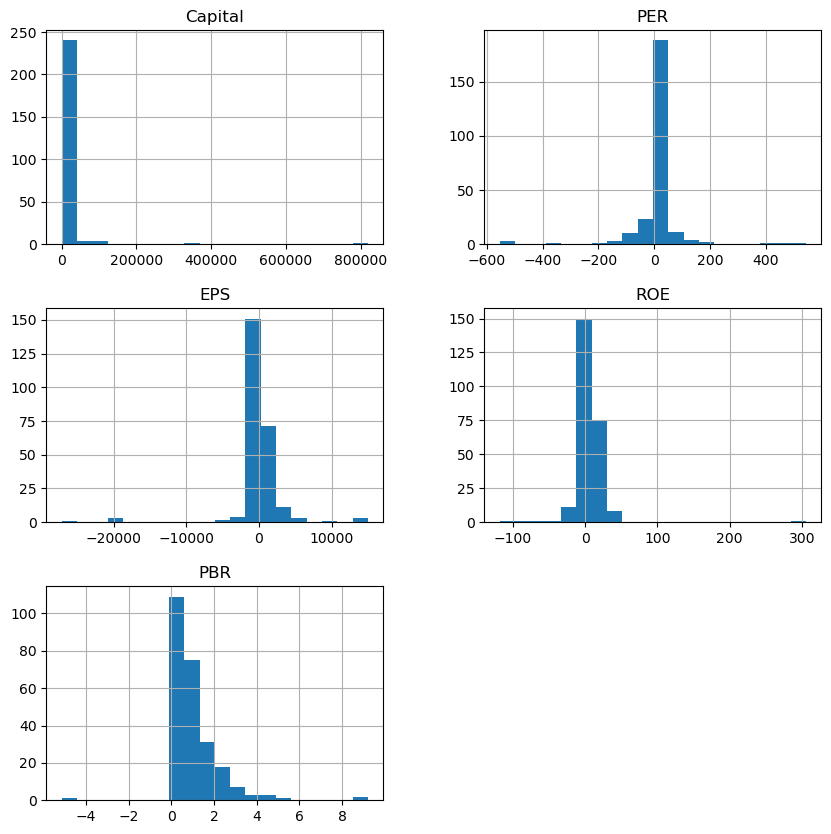

In [7]:
num_df.hist(bins=20, figsize=(10,10))

In [8]:
log_df = np.log(num_df)

array([[<Axes: title={'center': 'Capital'}>,
        <Axes: title={'center': 'PER'}>],
       [<Axes: title={'center': 'EPS'}>, <Axes: title={'center': 'ROE'}>],
       [<Axes: title={'center': 'PBR'}>, <Axes: >]], dtype=object)

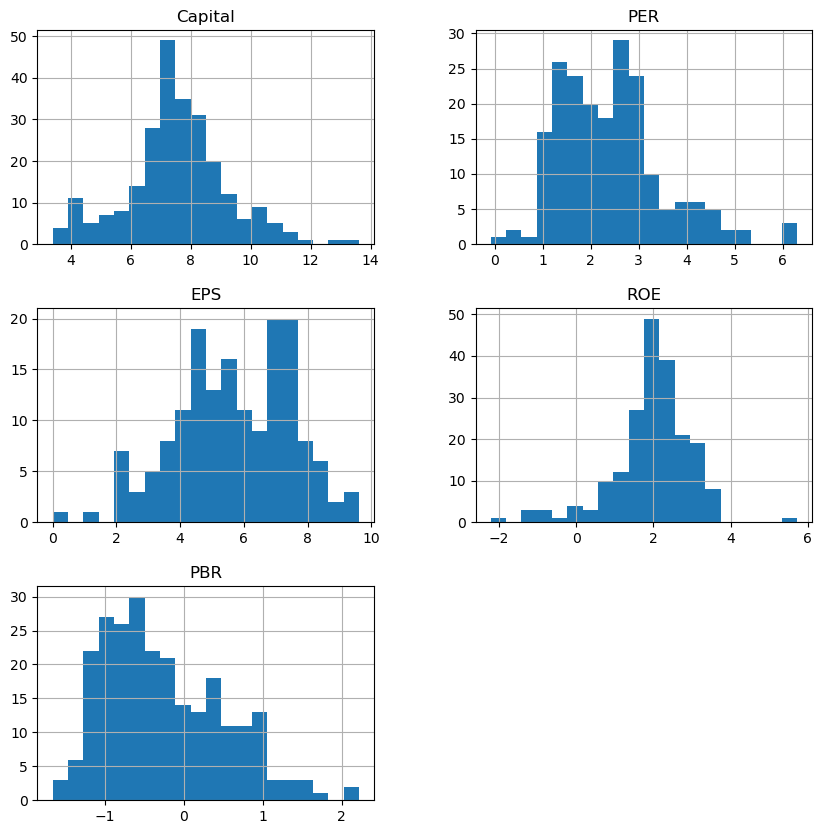

In [9]:
log_df.hist(bins=20, figsize=(10,10))

In [10]:
# 막간 이상치 처리방식 - KNN 
# 수질 데이터를 기반으로 수질 상태를 분류하기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [11]:
df5.head(1).T

,0
aluminium,1.65
ammonia,9.08
arsenic,0.04
barium,2.85
cadmium,0.007
chloramine,0.35
chromium,0.83
copper,0.17
flouride,0.05
bacteria,0.2


In [12]:
# 데이터 타입 확인 
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [13]:
# 암모니아 컬럼에 '#NUM! 으로 기록된 값 제거 
df5['ammonia'].value_counts()['#NUM!']
df5 = df5[df5['ammonia'].str.contains('#NUM!') == False]

In [14]:
# 결측값 처리
df5.dropna(inplace=True)
#df5.isnull().sum()

#데이터 타입 변경 
df5['ammonia'] = pd.to_numeric(df5['ammonia'])
df5['is_safe'] = pd.to_numeric(df5['is_safe'])

In [15]:
# 독립변수(X)와 종속변수(y) 지정
columns = df5.columns
columns = [c for c in columns if c not in ['is_safe']]
# 예측하고싶은 값
# is_safe 컬럼이 1이면 안전한 물을, 0이면 안전하지 않은 물을 의미합니다. 
y = df5['is_safe'] 
# 예측에 사용할 값 
X = df5[columns]  


# KNN 알고리즘 활용을 위한 TEST 셋과 TRAIN 셋 분리
# 훈련데이터셋: 모델이 학습할 데이터셋
# 테스트데이터셋: 모델 성능을 확인할 데이터셋 
# 테스트데이터셋을 30% 로 지정 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5597, 20), (2399, 20), (5597,), (2399,))

In [16]:
# scale 
sc = StandardScaler()

# 적용시킬 데이터 준비
sc.fit(X_train)

# 훈련데이터셋과 테스트 데이터셋에 적용
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
# KNN알고리즘 훈련 데이터셋에 적용 
knn = KNeighborsClassifier()   
knnc = knn.fit(X_train,y_train)

# 테스트 데이터셋 예측 
y_pred_knnc = knnc.predict(X_test)
y_pred_knnc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
# 결과 확인 
# Precision(정밀도): 예측한 클래스 중 실제로 해당 클래스인 데이터의 비율
# Recall(재현율): 실제 클래스 중 예측한 클래스와 일치한 데이터의 비율
# F1-score: Precision과 Recall의 조화평균
# Support: 각 클래스의 실제 데이터 수
# 정답(y_test) 과 예측값(y_pred_knnc)에 대한 리포트 생성 
# accuracy = 0.86  
# 0 레이블: 안전하지 않은 물에 대한 예측지표 
# 1 레이블: 안전한 물에 대한 예측지표

# 현재 데이터셋의 경우, 데이터 불균형으로 인해 안전한 물에 대한 예측지표가 낮게 학습되었습니다. 
# 1 레이블의 recall 이 0.11 이라는 것은 실제로는 안전하지만, 안전하지 않다고 예측한 경우가 많다는 의미.
# 이렇게 데이터가 불균형을 이룰 때는 F1-score(precision 과 Recall 의 조화평균)을 보면 됩니다. :- ) 
# 그래도 1 레이블의 f1-score 는 0.17 입니다. 

print(classification_report(y_test, y_pred_knnc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2091
           1       0.38      0.11      0.17       308

    accuracy                           0.86      2399
   macro avg       0.63      0.54      0.55      2399
weighted avg       0.82      0.86      0.83      2399

